In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from weather import WeatherDataAnalyzer 
from meteostat import Point, Daily, Hourly



In [3]:
#Nagpur Coords
hrs=Hourly(Point(21.1458,79.0882),start=datetime(2023,5,1),end=datetime(2023,5,31))
data=hrs.fetch().reset_index()
print(data)

                   time  temp  dwpt   rhum  prcp  snow   wdir  wspd  wpgt  \
0   2023-05-01 00:00:00  20.4  19.7   96.0   0.0  <NA>   90.0   3.6  <NA>   
1   2023-05-01 01:00:00  21.0  21.0  100.0   0.0  <NA>   90.0   3.6  <NA>   
2   2023-05-01 02:00:00  22.0  21.0   94.0   0.0  <NA>  170.0   7.6  <NA>   
3   2023-05-01 03:00:00  24.4  20.1   77.0   0.0  <NA>  180.0   9.4  <NA>   
4   2023-05-01 04:00:00  26.0  24.0   89.0   0.0  <NA>  200.0   9.4  <NA>   
..                  ...   ...   ...    ...   ...   ...    ...   ...   ...   
716 2023-05-30 20:00:00  30.0  20.0   55.0   0.0  <NA>  343.0   5.5  <NA>   
717 2023-05-30 21:00:00  29.0  19.9   58.0   0.0  <NA>  320.0   5.4  <NA>   
718 2023-05-30 22:00:00  29.0  19.9   58.0   0.0  <NA>   10.0   3.6  <NA>   
719 2023-05-30 23:00:00  29.0  19.9   58.0   0.0  <NA>   30.0   3.6  <NA>   
720 2023-05-31 00:00:00  26.0  19.9   69.0   0.0  <NA>   50.0   3.6  <NA>   

       pres  tsun  coco  
0    1008.4  <NA>   5.0  
1    1010.0  <NA>   5.0

In [4]:
data.shape

(721, 12)

In [5]:
data.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2023-05-01 00:00:00,20.4,19.7,96.0,0.0,<NA>,90.0,3.6,<NA>,1008.4,<NA>,5.0
1,2023-05-01 01:00:00,21.0,21.0,100.0,0.0,<NA>,90.0,3.6,<NA>,1010.0,<NA>,5.0
2,2023-05-01 02:00:00,22.0,21.0,94.0,0.0,<NA>,170.0,7.6,<NA>,1011.0,<NA>,5.0
3,2023-05-01 03:00:00,24.4,20.1,77.0,0.0,<NA>,180.0,9.4,<NA>,1010.0,<NA>,5.0
4,2023-05-01 04:00:00,26.0,24.0,89.0,0.0,<NA>,200.0,9.4,<NA>,1012.0,<NA>,5.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    721 non-null    datetime64[ns]
 1   temp    721 non-null    Float64       
 2   dwpt    721 non-null    Float64       
 3   rhum    721 non-null    Float64       
 4   prcp    721 non-null    Float64       
 5   snow    0 non-null      Float64       
 6   wdir    721 non-null    Float64       
 7   wspd    721 non-null    Float64       
 8   wpgt    0 non-null      Float64       
 9   pres    721 non-null    Float64       
 10  tsun    0 non-null      Float64       
 11  coco    721 non-null    Float64       
dtypes: Float64(11), datetime64[ns](1)
memory usage: 75.5 KB


In [7]:
data.isna().sum()

time      0
temp      0
dwpt      0
rhum      0
prcp      0
snow    721
wdir      0
wspd      0
wpgt    721
pres      0
tsun    721
coco      0
dtype: int64

In [8]:
data.drop(columns=['snow','wpgt','tsun'],axis=1,inplace=True)

In [9]:
data

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
0,2023-05-01 00:00:00,20.4,19.7,96.0,0.0,90.0,3.6,1008.4,5.0
1,2023-05-01 01:00:00,21.0,21.0,100.0,0.0,90.0,3.6,1010.0,5.0
2,2023-05-01 02:00:00,22.0,21.0,94.0,0.0,170.0,7.6,1011.0,5.0
3,2023-05-01 03:00:00,24.4,20.1,77.0,0.0,180.0,9.4,1010.0,5.0
4,2023-05-01 04:00:00,26.0,24.0,89.0,0.0,200.0,9.4,1012.0,5.0
...,...,...,...,...,...,...,...,...,...
716,2023-05-30 20:00:00,30.0,20.0,55.0,0.0,343.0,5.5,1009.0,5.0
717,2023-05-30 21:00:00,29.0,19.9,58.0,0.0,320.0,5.4,1006.5,5.0
718,2023-05-30 22:00:00,29.0,19.9,58.0,0.0,10.0,3.6,1009.0,5.0
719,2023-05-30 23:00:00,29.0,19.9,58.0,0.0,30.0,3.6,1009.0,5.0


In [10]:
data.isnull().sum()

time    0
temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
pres    0
coco    0
dtype: int64

In [11]:
data.describe()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
count,721,721.0,721.0,721.0,721.0,721.0,721.0,721.0,721.0
mean,2023-05-16 00:00:00,32.330097,18.122607,48.117892,0.020666,204.080444,7.427046,1007.405687,5.231623
min,2023-05-01 00:00:00,20.4,3.9,10.0,0.0,0.0,0.0,973.0,1.0
25%,2023-05-08 12:00:00,28.0,15.8,31.0,0.0,90.0,3.6,1006.0,5.0
50%,2023-05-16 00:00:00,32.0,18.4,45.0,0.0,250.0,5.4,1007.6,5.0
75%,2023-05-23 12:00:00,37.0,21.0,62.0,0.0,320.0,9.4,1009.0,5.0
max,2023-05-31 00:00:00,44.0,26.0,100.0,4.0,360.0,33.5,1015.0,25.0
std,NaN,5.709166,3.830822,21.565114,0.188937,121.697481,5.496042,2.848213,2.267622


Text(0.5, 1.0, 'Hourly Temperature in Nagpur - May 2023')

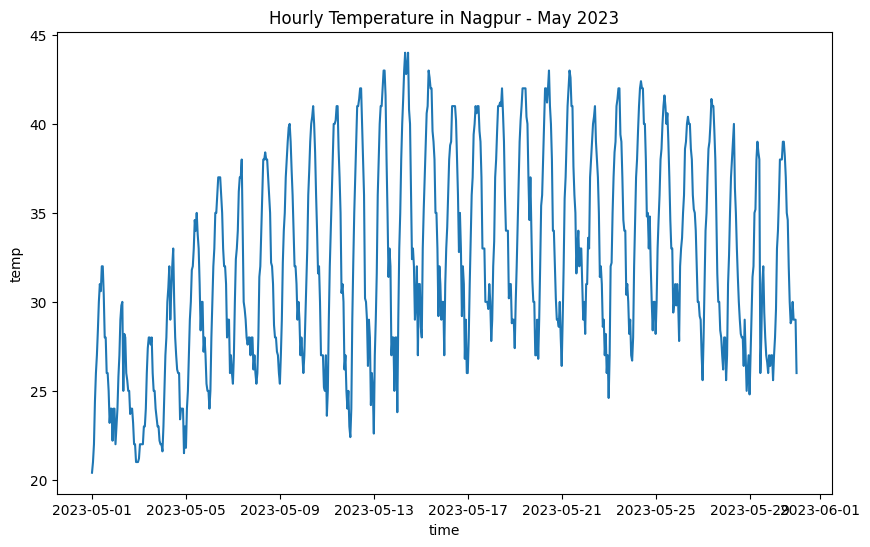

In [12]:
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=data,x='time',y='temp',ax=ax,)
ax.set_title('Hourly Temperature in Nagpur - May 2023')

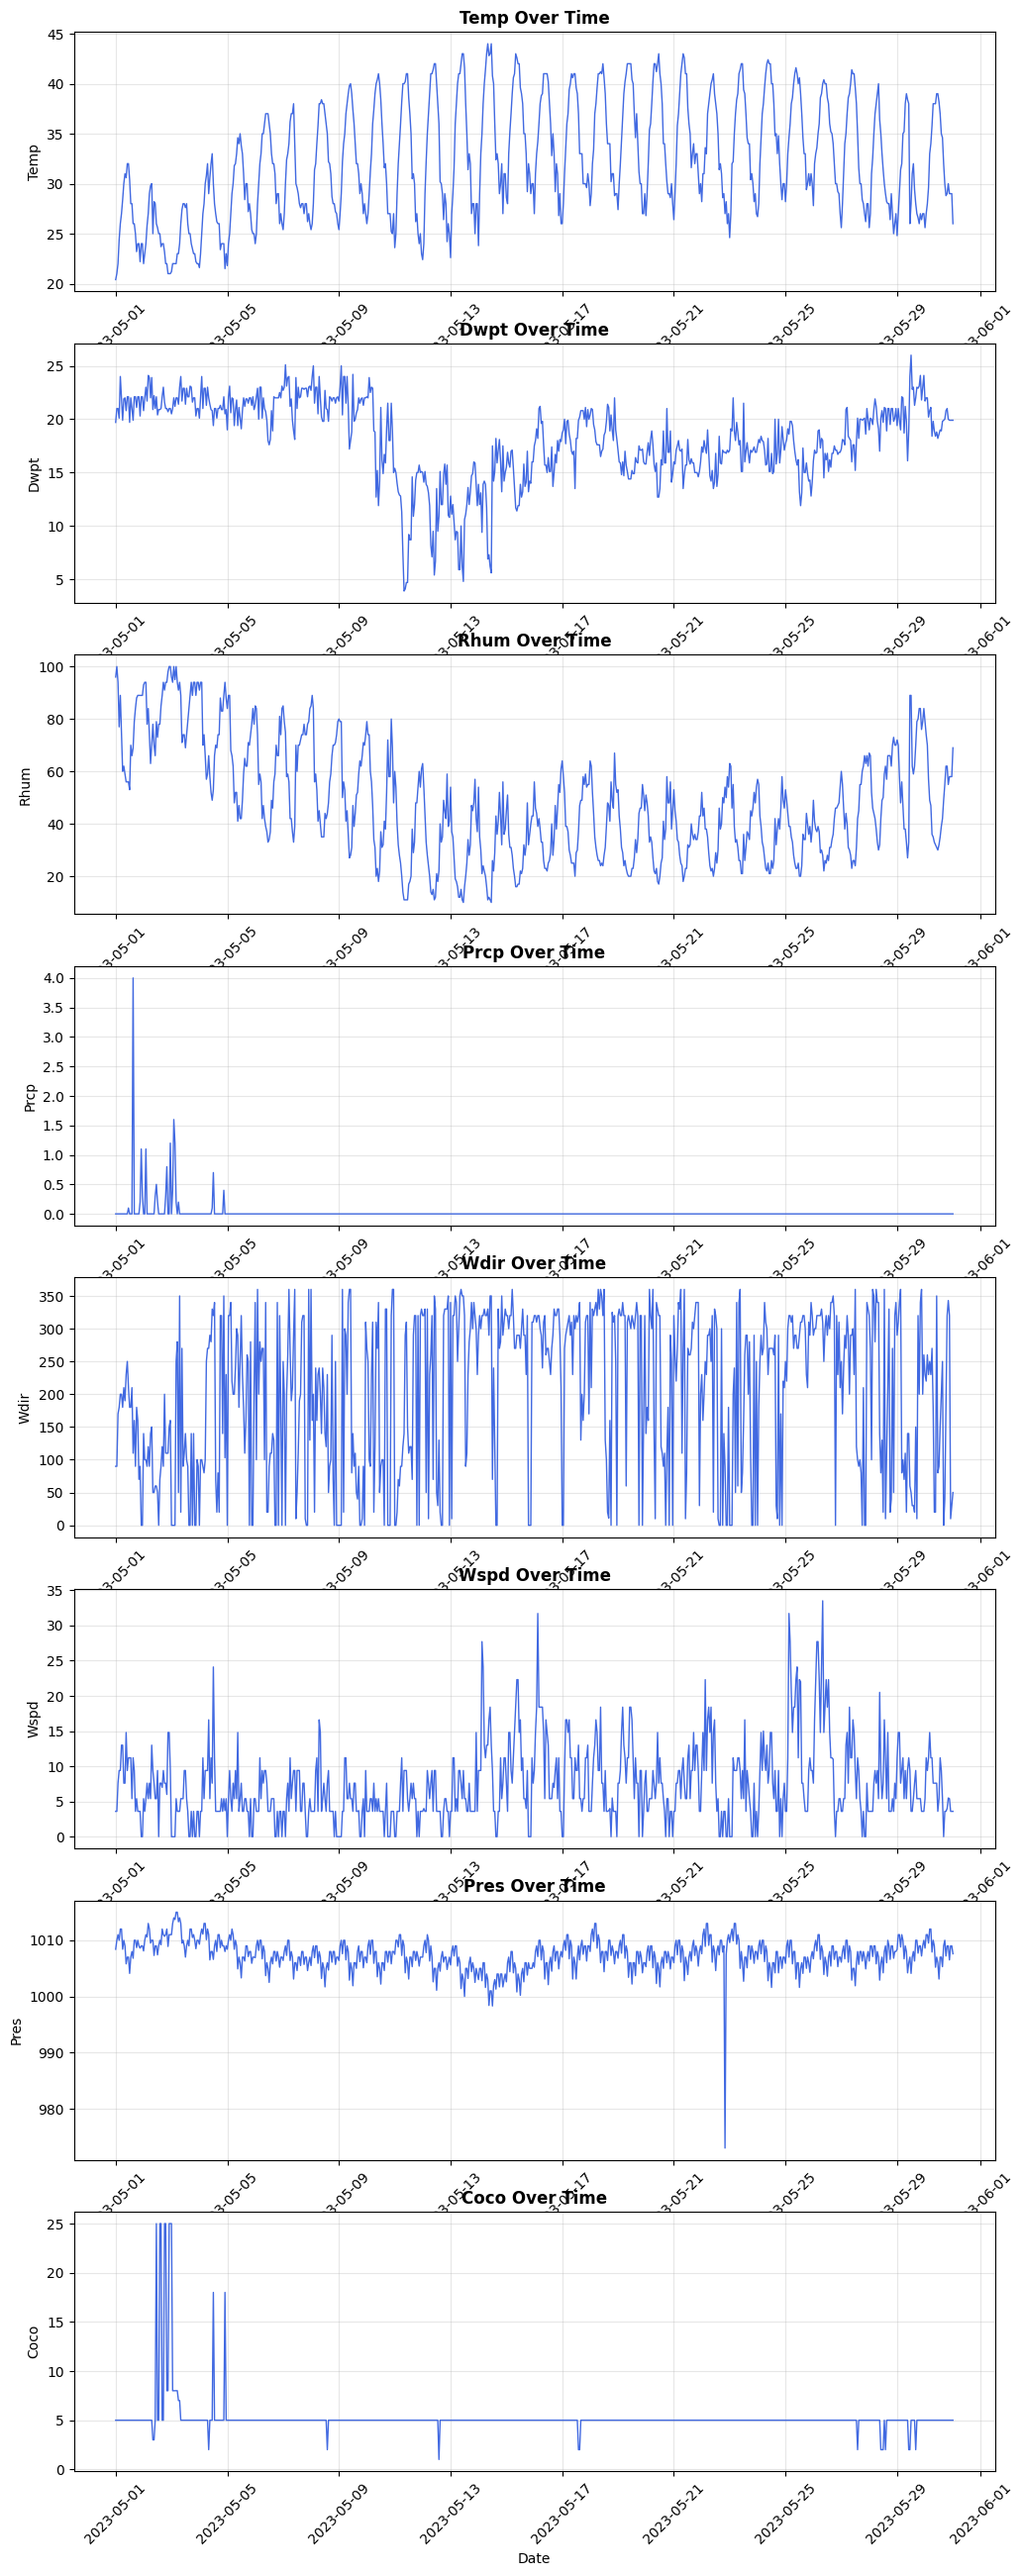

In [13]:
cols=['temp','dwpt','rhum','prcp','wdir','wspd','pres','coco']
fig,axes=plt.subplots(8,figsize=(12,32))
for i,col in enumerate(cols):
    axes[i].plot(data['time'], data[col], linewidth=1, color='royalblue')
    axes[i].set_title(f'{col.title()} Over Time', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel(col.title(), fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
#Daily data
daily_df=Daily(Point(21.1458,79.0882),start=datetime(2023,5,1),end=datetime(2023,5,31)).fetch().reset_index()
daily_df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-05-01,26.3,19.3,32.0,23.9,<NA>,<NA>,8.2,<NA>,1008.8,<NA>
1,2023-05-02,24.9,22.0,30.4,0.0,<NA>,<NA>,5.9,<NA>,1009.8,<NA>
2,2023-05-03,24.4,20.1,28.0,7.1,<NA>,<NA>,4.9,<NA>,1011.4,<NA>
3,2023-05-04,27.1,20.9,33.0,0.0,<NA>,<NA>,6.5,<NA>,1010.0,<NA>
4,2023-05-05,29.2,21.1,35.2,0.0,<NA>,<NA>,5.5,<NA>,1008.4,<NA>
